# Explore the dataset


In [1]:
import pandas as pd
import librosa
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
INPUT_PATH = "../dataset/"
SAMPLE_RATE = 22050

metadata = pd.read_csv(INPUT_PATH + "metadata.csv")
annotation = pd.read_csv(INPUT_PATH + "annotation.csv")
lables = pd.read_csv(INPUT_PATH + "labels.csv")

audio_info = pd.merge(metadata, lables, on="filename")
print("Shape of Metadata : ", metadata.shape)
print("Shape of Annotation : ", annotation.shape)
print("Shape of Lables : ", lables.shape)
print("Shape of Audio info : ", audio_info.shape)

audio_info.head()

sns.set_theme(context="paper", font_scale=1)

Shape of Metadata :  (661, 7)
Shape of Annotation :  (390, 5)
Shape of Lables :  (661, 3)
Shape of Audio info :  (661, 9)


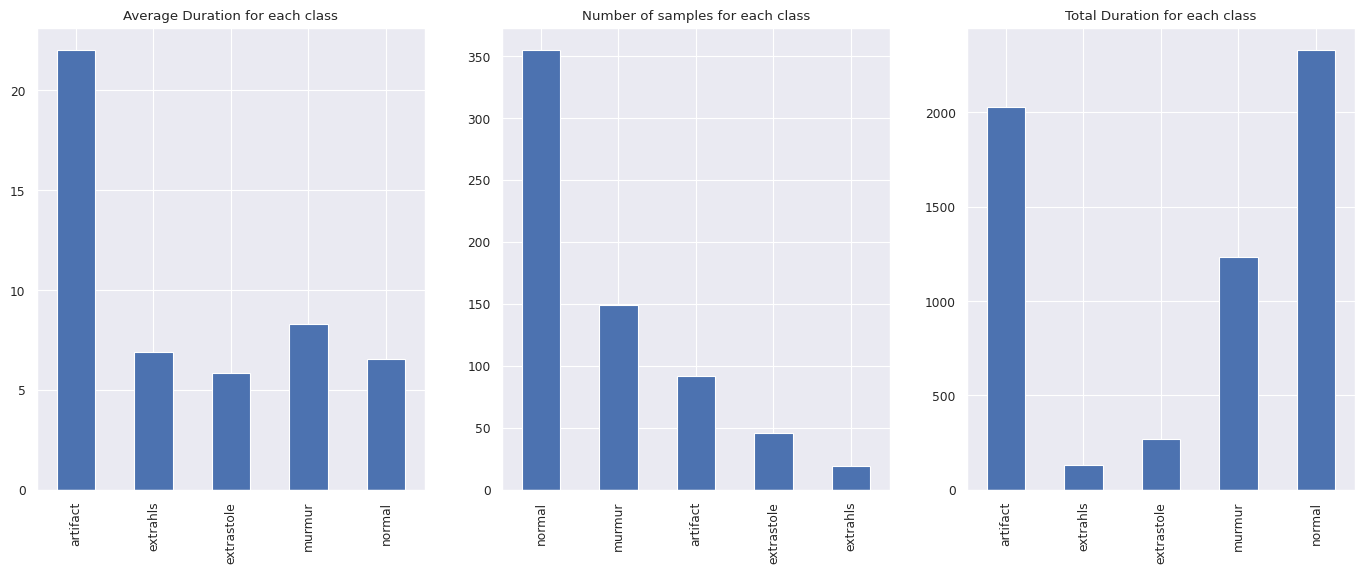

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(17, 6))

# avg duraton for each class
audio_info.groupby("label")["duration"].mean().plot.bar(
    ax=axs[0], title="Average Duration for each class"
)
_ = axs[0].set_xlabel("")

# number of samples for each class
audio_info["label"].value_counts().plot.bar(
    ax=axs[1], title="Number of samples for each class"
)
_ = axs[1].set_xlabel("")

# total duration for each class
audio_info.groupby("label")["duration"].sum().plot.bar(
    ax=axs[2], title="Total Duration for each class"
)
_ = axs[2].set_xlabel("")

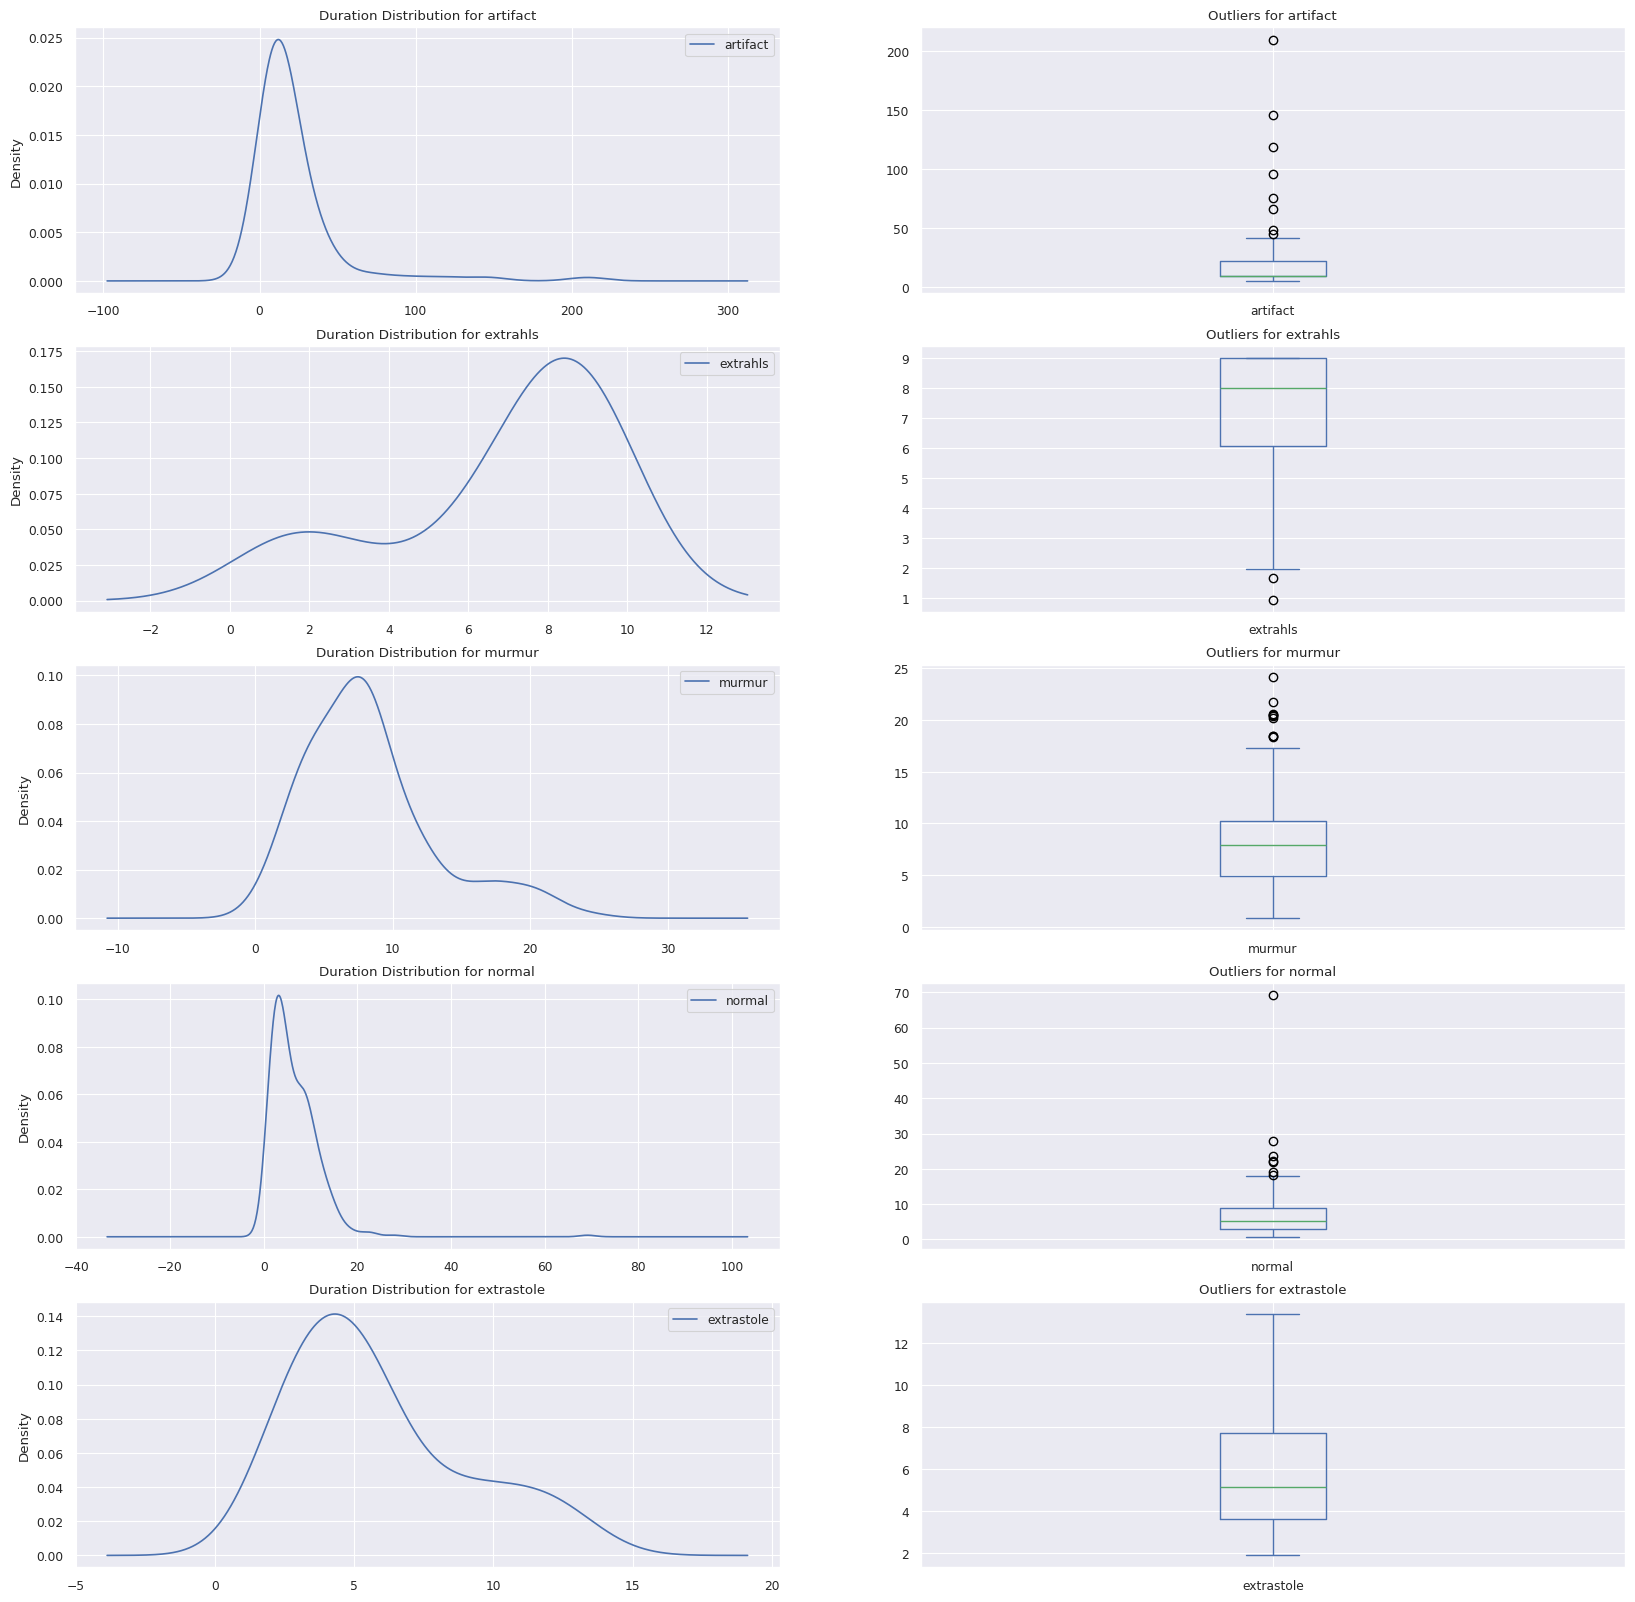

In [4]:
# duration distribution
names = audio_info["label"].unique()
fig, axs = plt.subplots(len(names), 2, figsize=(20, 20))

for i, name in enumerate(names):
    audio_info[audio_info["label"] == name].groupby("label")["duration"].plot(
        legend=True, title=f"Duration Distribution for {name}", kind="kde", ax=axs[i][0]
    )
    audio_info[audio_info["label"] == name].groupby("label")["duration"].plot(
        legend=True, title=f"Outliers for {name}", kind="box", ax=axs[i][1]
    )

In [5]:
# Calculate the quantiles for each label
Q1 = audio_info.groupby("label")["duration"].apply(lambda x: x.quantile(0.25))
Q3 = audio_info.groupby("label")["duration"].apply(lambda x: x.quantile(0.75))

# Calculate the IQR for each label
IQR = Q3 - Q1

# Find the outliers for each label using IQR
outliers = audio_info.groupby("label").apply(
    lambda x: x[
        (x["duration"] < (Q1[x.name] - 1.5 * IQR[x.name]))
        | (x["duration"] > (Q3[x.name] + 1.5 * IQR[x.name]))
    ]
)

artifact_out = outliers[outliers["label"] == "artifact"]["filename"].to_list()

# drop the outliers
audio_info_outliers = audio_info[~audio_info["filename"].isin(artifact_out)]

/tmp/ipykernel_5763/2824256892.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = audio_info.groupby("label").apply(


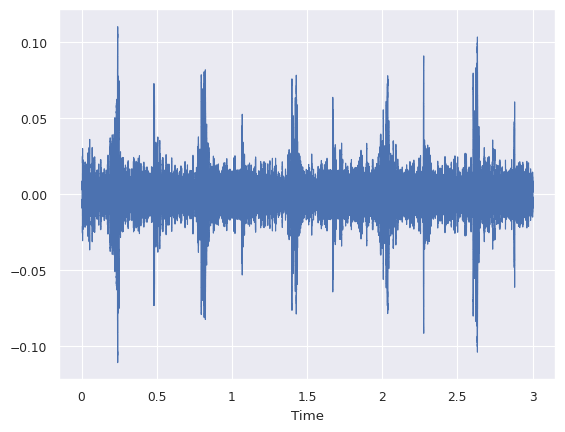

In [6]:
# loading and visualizing a sample wave

sampledata, sampling_rate = librosa.load(
    INPUT_PATH + "audio/normal__201102081321.wav", sr=SAMPLE_RATE, duration=3
)
librosa.display.waveshow(sampledata, sr=sampling_rate)

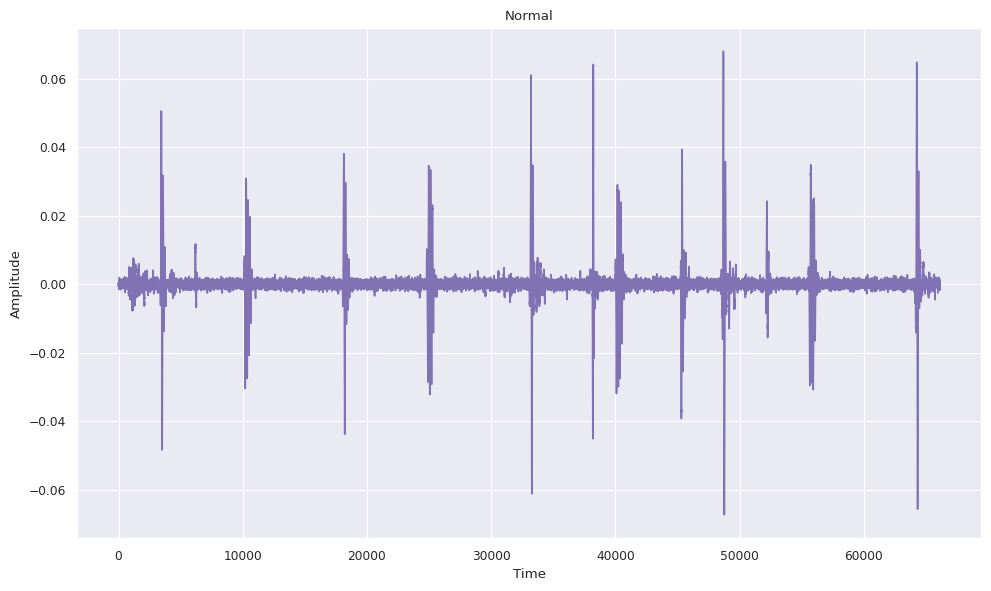

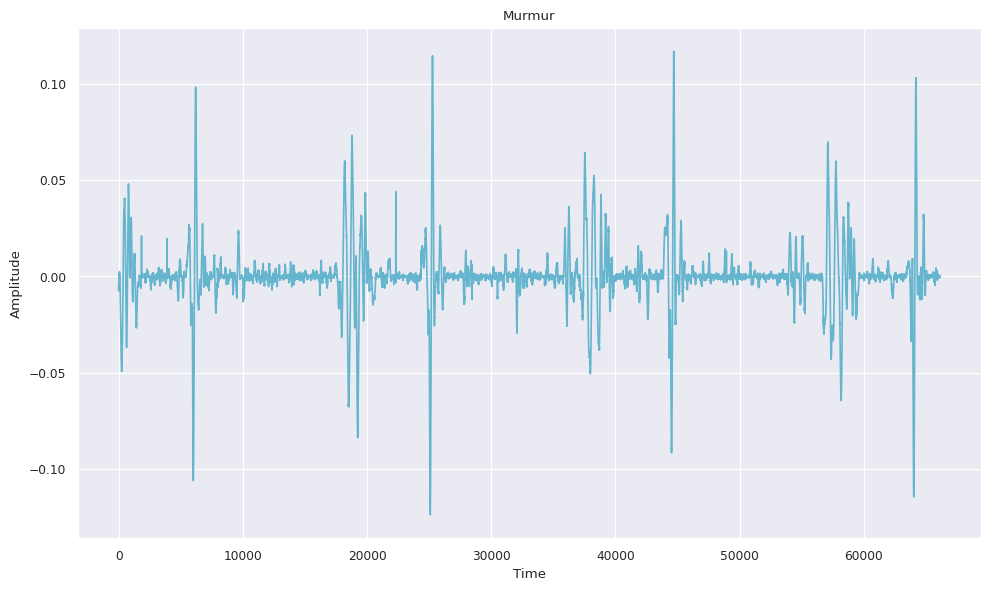

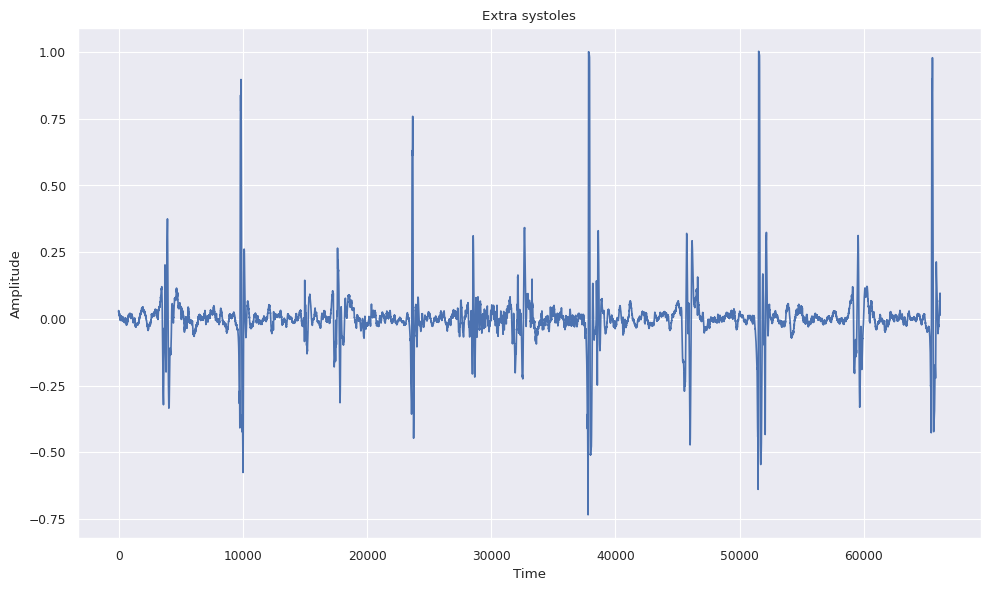

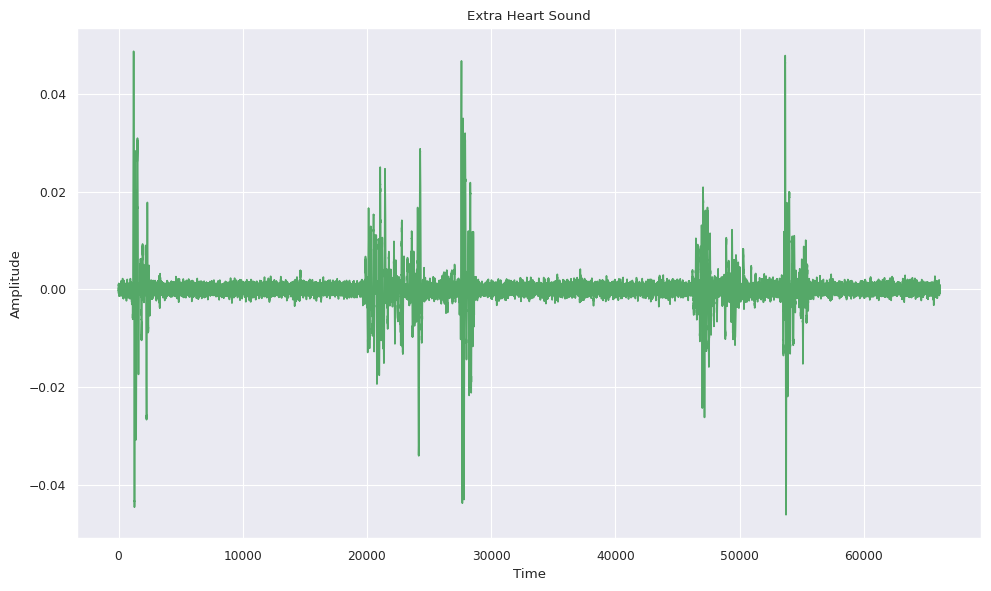

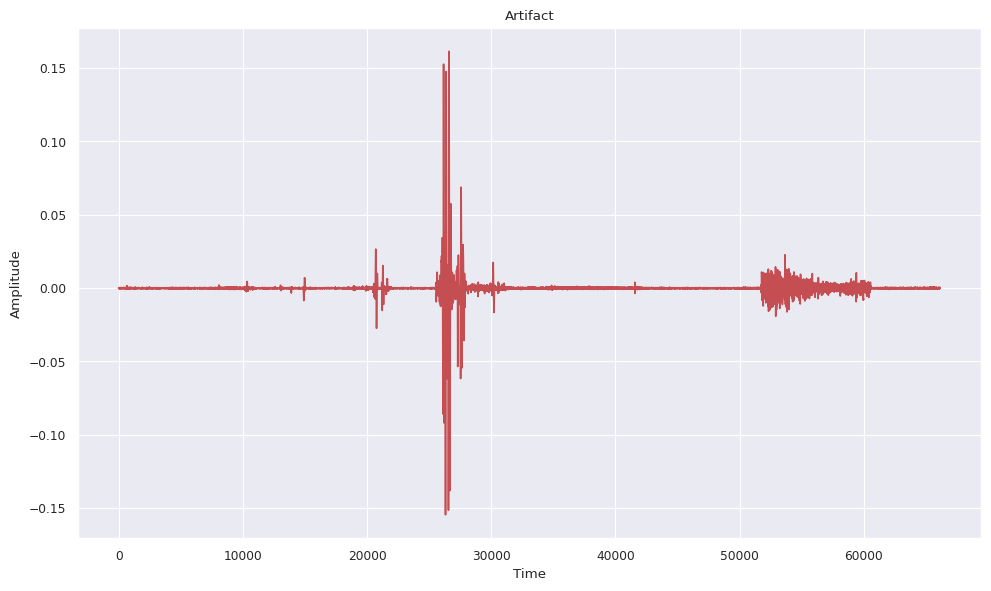

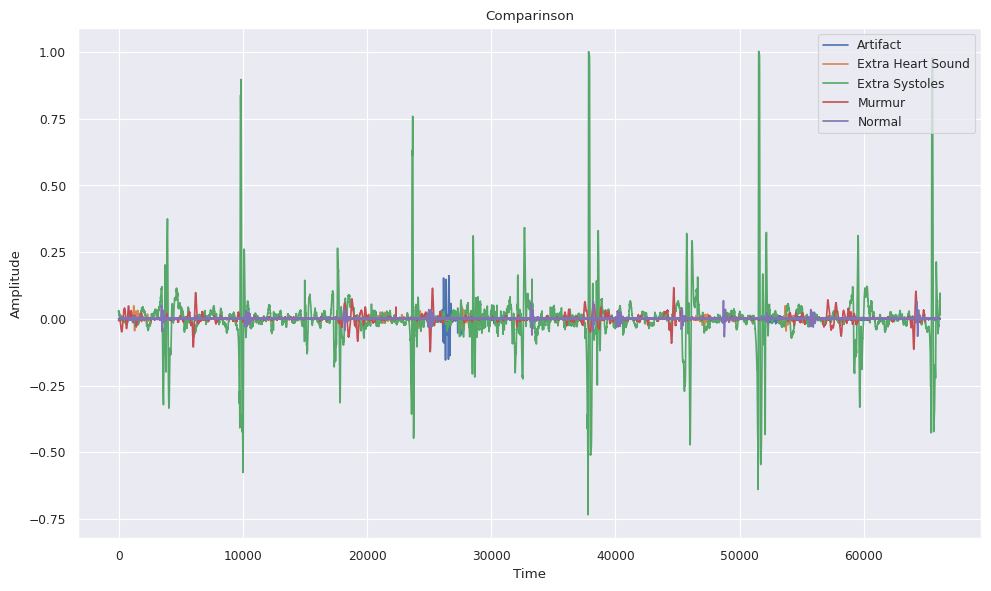

In [11]:
import librosa
import matplotlib.pyplot as plt

normal = audio_info.loc[audio_info["label"] == "normal"].head(1)
murmur = audio_info.loc[audio_info["label"] == "murmur"].head(1)
extrastole = audio_info.loc[audio_info["label"] == "extrastole"].head(1)
extrahls = audio_info.loc[audio_info["label"] == "extrahls"].head(1)
artifact = audio_info.loc[audio_info["label"] == "artifact"].head(1)

# Path to the audio files
path_normal = INPUT_PATH + "audio/" + normal["filename"].values[0]
path_murmur = INPUT_PATH + "audio/" + murmur["filename"].values[0]
path_extrastole = INPUT_PATH + "audio/" + extrastole["filename"].values[0]
path_extrahls = INPUT_PATH + "audio/" + extrahls["filename"].values[0]
path_artifact = INPUT_PATH + "audio/" + artifact["filename"].values[0]

# Load the audio files
y_normal, sr_normal = librosa.load(path_normal, sr=SAMPLE_RATE, duration=3)
y_murmur, sr_murmur = librosa.load(path_murmur, sr=SAMPLE_RATE, duration=3)
y_extrastole, sr_extrastole = librosa.load(path_extrastole, sr=SAMPLE_RATE, duration=3)
y_extrahls, sr_extrahls = librosa.load(path_extrahls, sr=SAMPLE_RATE, duration=3)
y_artifact, sr_artifact = librosa.load(path_artifact, sr=SAMPLE_RATE, duration=3)


# Plotting the waveforms
plt.figure(figsize=(10, 6))
plt.title("Normal")
plt.plot(y_normal, c="m")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Murmur")
plt.plot(y_murmur, c="c")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Extra systoles")
plt.plot(y_extrastole, c="b")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Extra Heart Sound")
plt.plot(y_extrahls, c="g")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Artifact")
plt.plot(y_artifact, c="r")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Comparinson")
plt.plot(y_artifact, label="Artifact")
plt.plot(y_extrahls, label="Extra Heart Sound")
plt.plot(y_extrastole, label="Extra Systoles")
plt.plot(y_murmur, label="Murmur")
plt.plot(y_normal, label="Normal")
plt.legend(loc="upper right")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

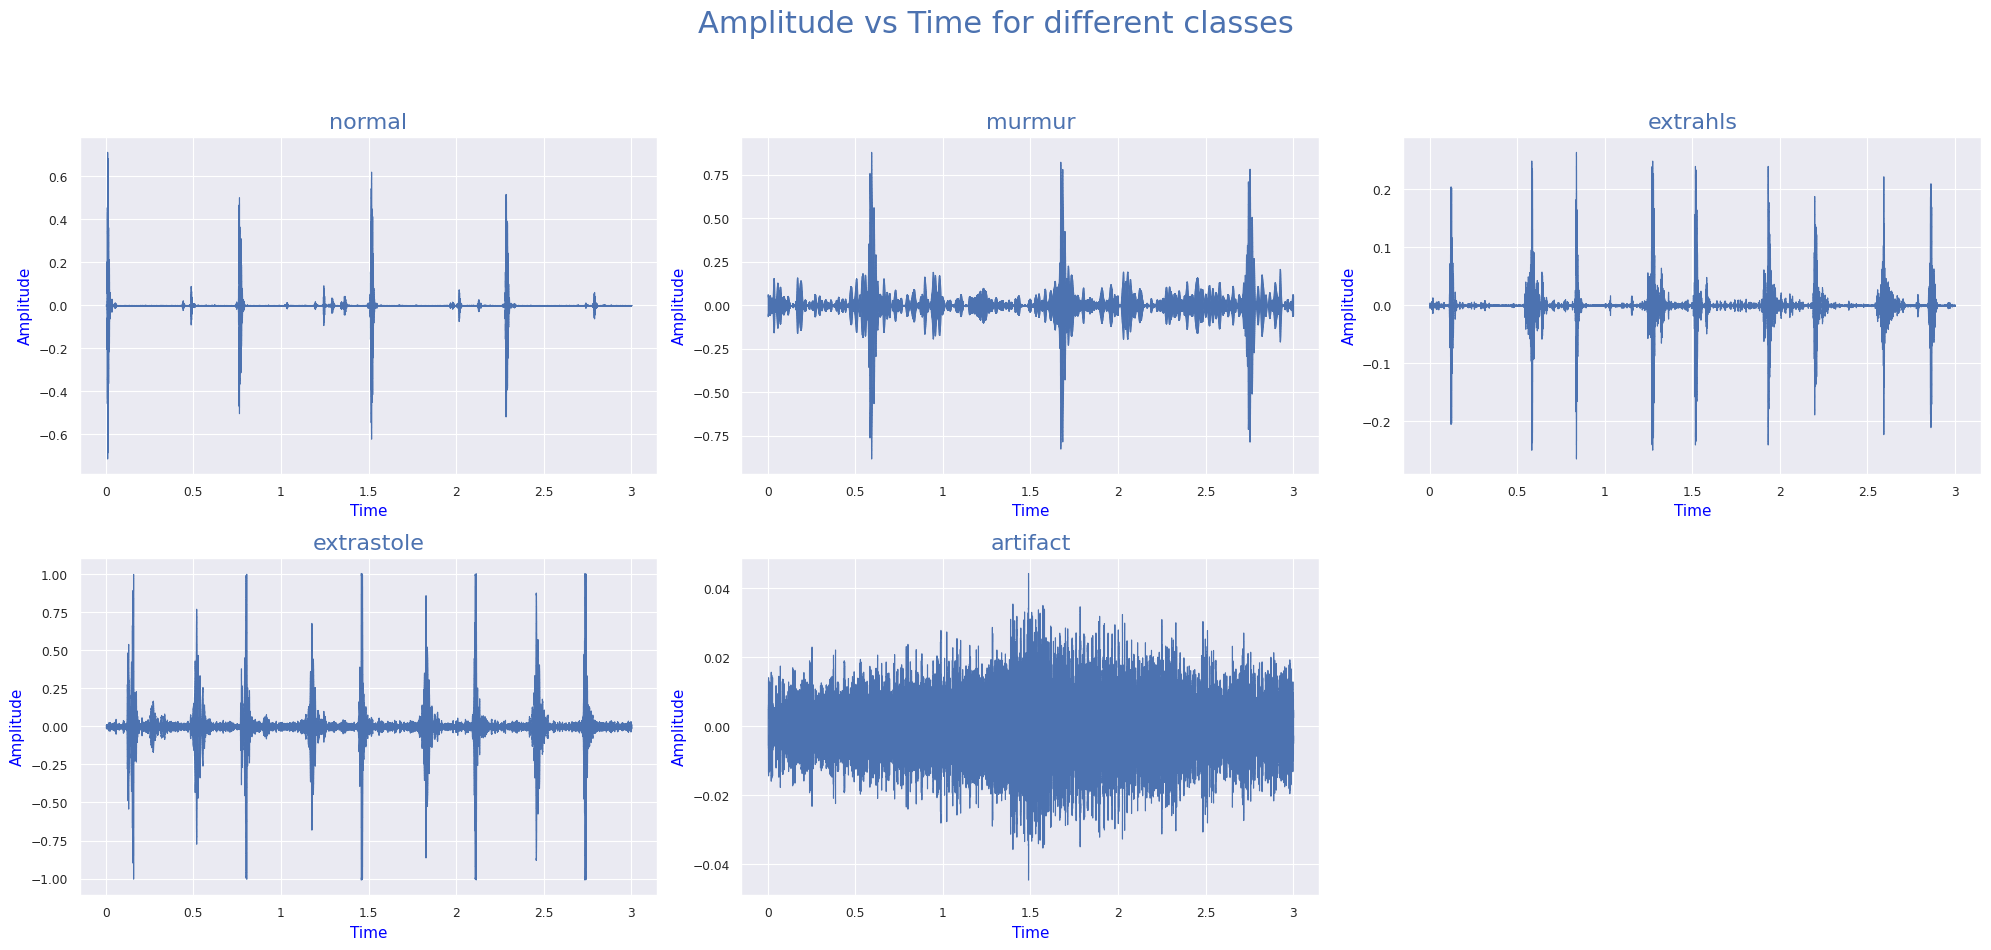

In [8]:
# oscillogram plots for all types of classes

samples = [
    "normal__201103170121.wav",
    "murmur__201101180902.wav",
    "extrahls__201101241423.wav",
    "extrastole__151_1306779785624_B.wav",
    "artifact__201106171003.wav",
]

sns.set_theme(context="paper", font_scale=1)

with plt.rc_context():
    plt.figure(figsize=(20, 9))
    plt.subplots_adjust(bottom=0.1e-5)
    plt.suptitle(
        "Amplitude vs Time for different classes", x=0.5, y=1.05, fontsize=22, color="b"
    )
    for i, f in enumerate(samples, 1):
        if i < 6:
            y, sr = librosa.load(INPUT_PATH + "audio/" + f, sr=SAMPLE_RATE, duration=3)
            plt.subplot(2, 3, i)
            librosa.display.waveshow(y, sr=SAMPLE_RATE)
            plt.title(f.split("_")[0], fontsize=16, color="b")
            plt.xlabel("Time", fontsize=11, color="blue")
            plt.ylabel("Amplitude", fontsize=11, color="blue")
    plt.tight_layout()

### Sample rate distribution


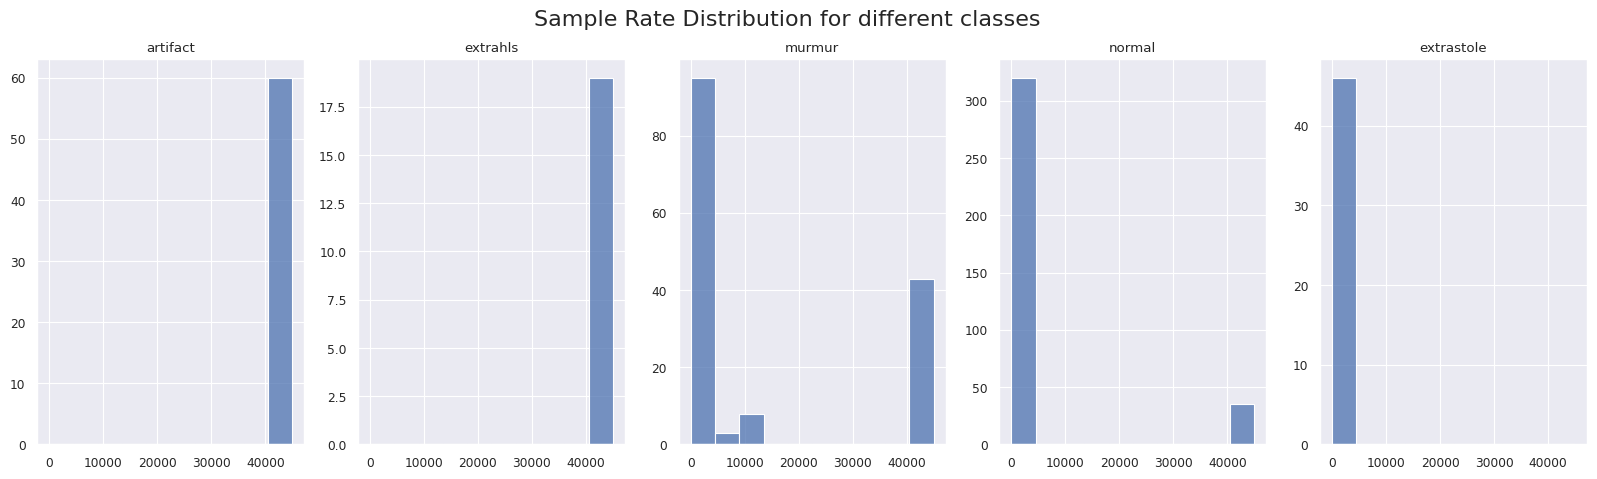

In [9]:
unique_labels = audio_info["label"].unique()
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, label in enumerate(unique_labels):
    audio_info_tmp = audio_info[audio_info["label"] == label]
    sns.histplot(audio_info_tmp["sample_rate"], ax=axs[i], bins=10, binrange=(0, 45000))
    axs[i].set_title(label)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    fig.suptitle("Sample Rate Distribution for different classes", fontsize=16)

In [10]:
audio_info["sample_rate"].unique()

array([44100,  4000, 11025,  8000, 48000])

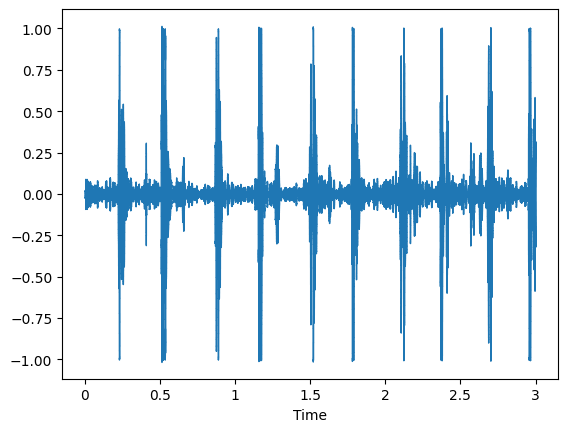

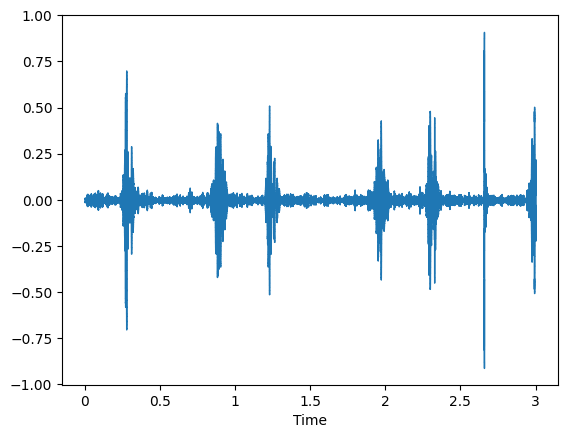

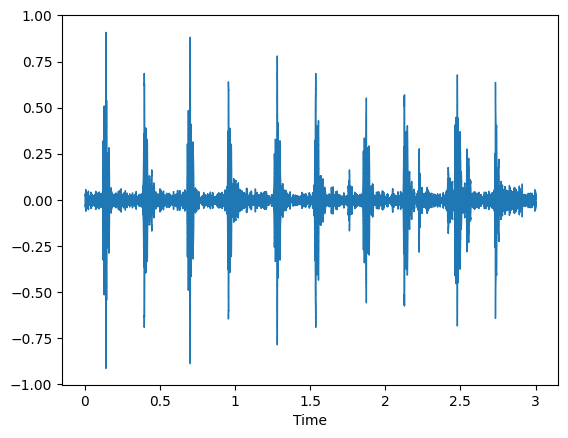

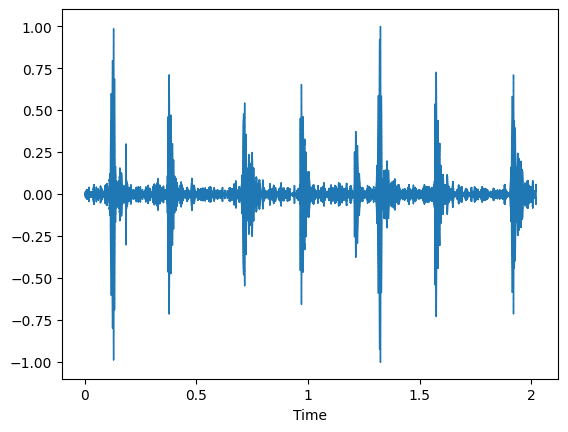

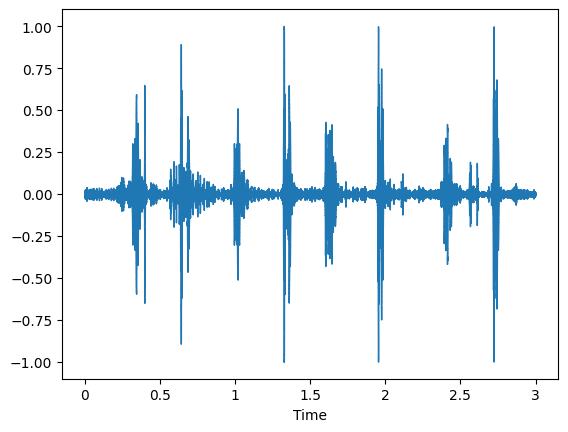

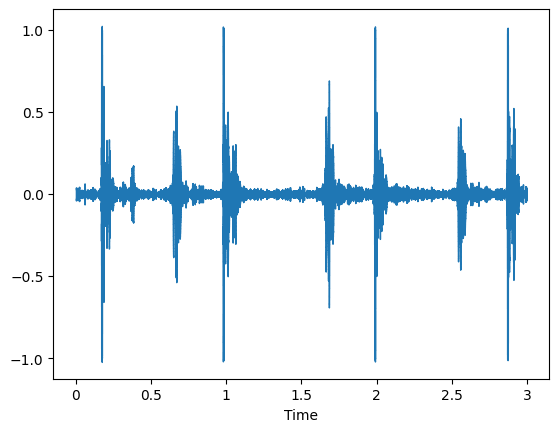

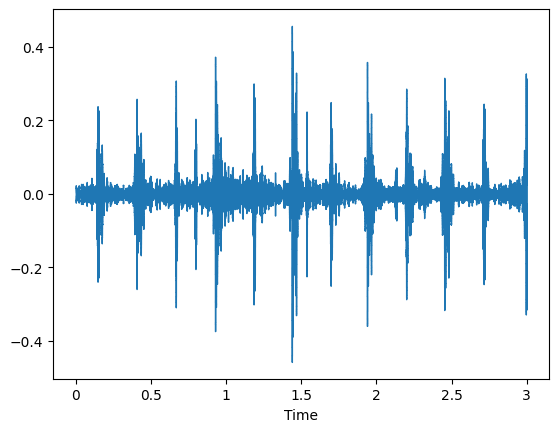

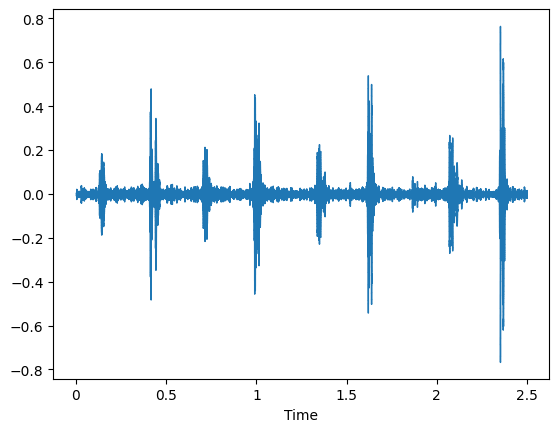

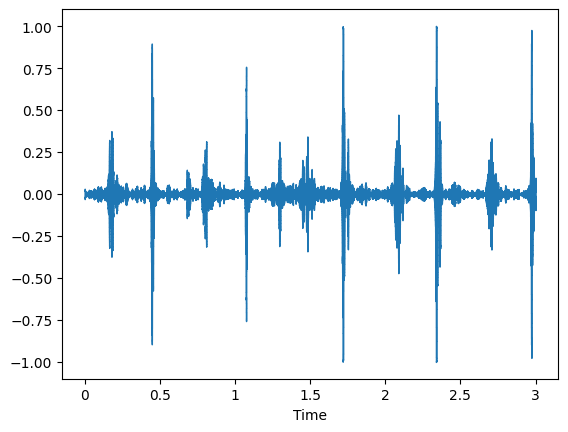

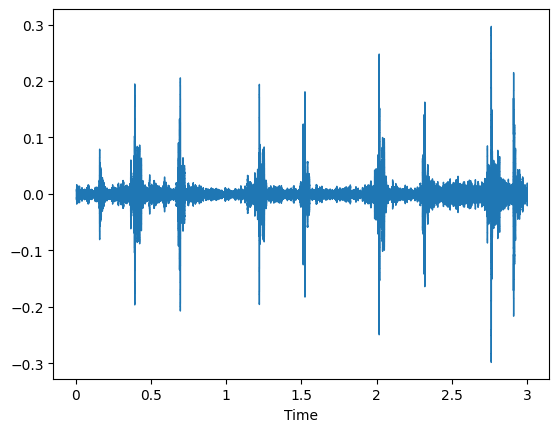

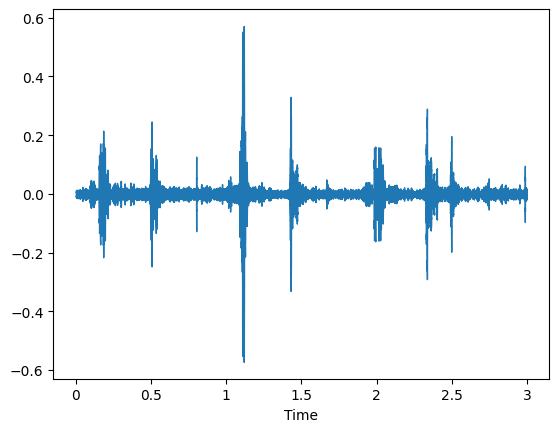

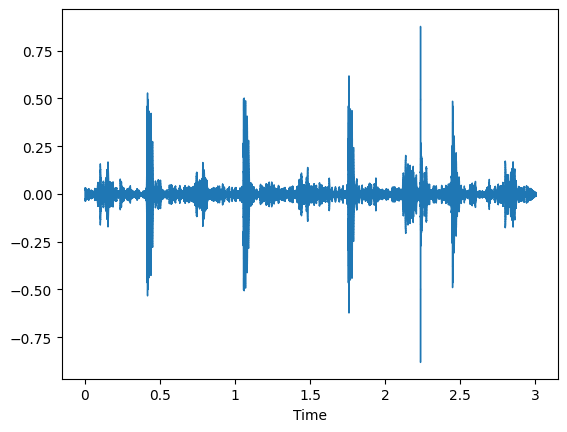

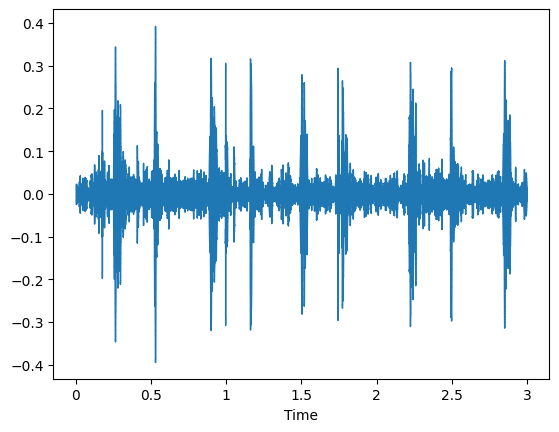

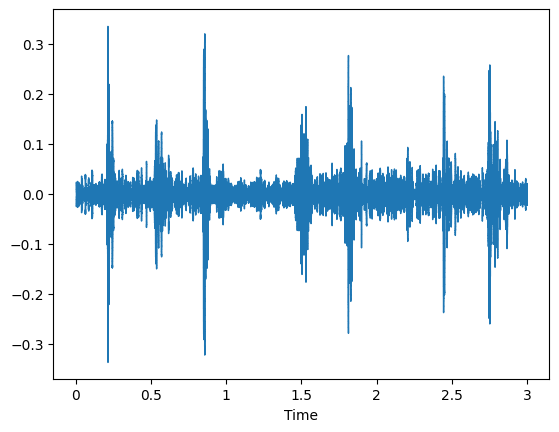

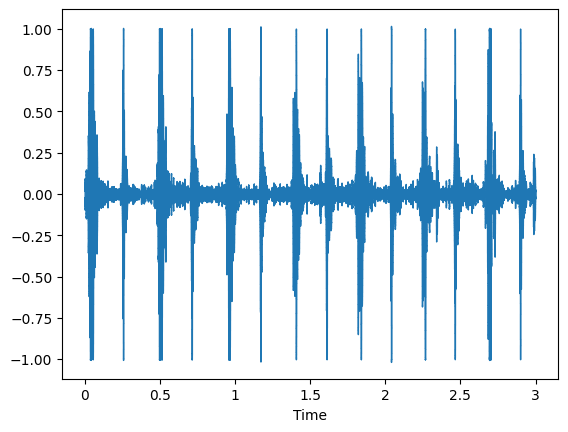

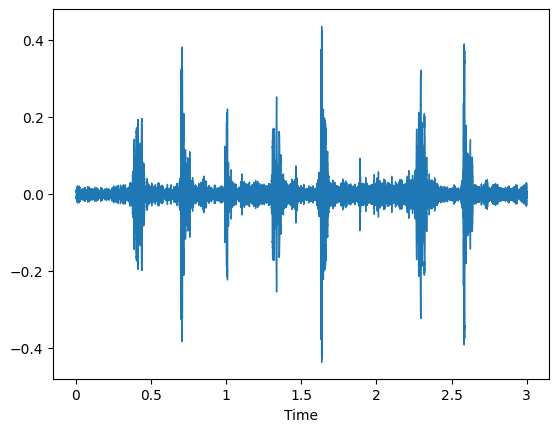

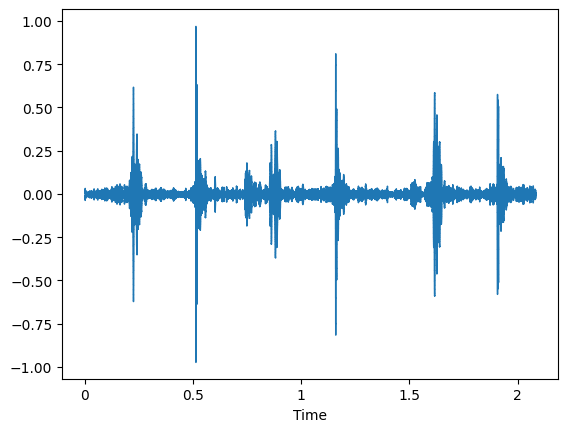

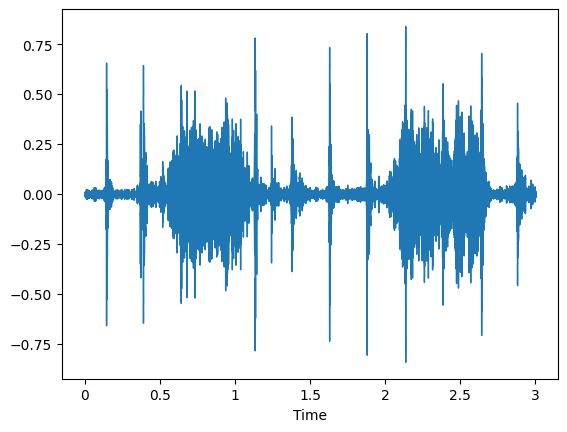

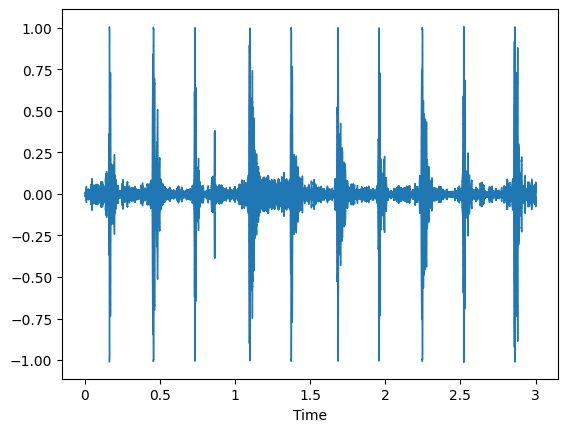

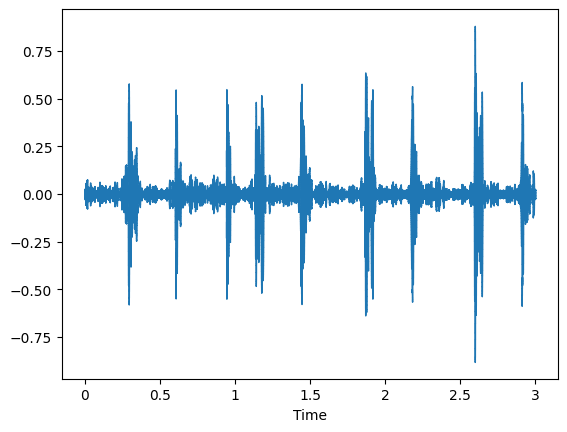

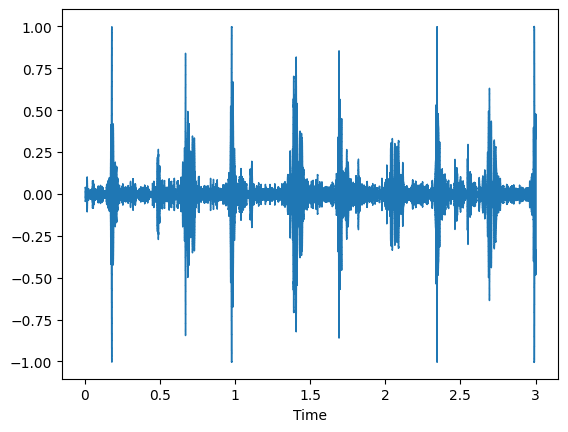

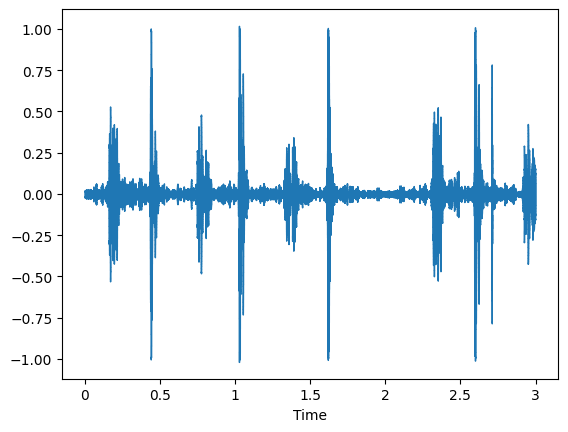

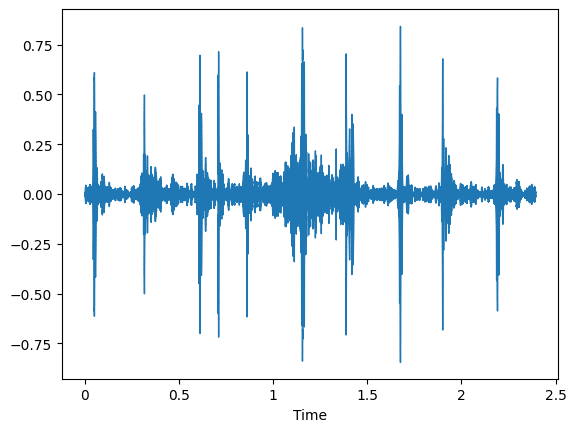

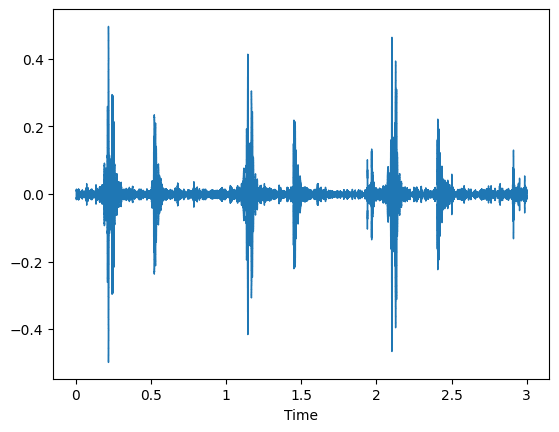

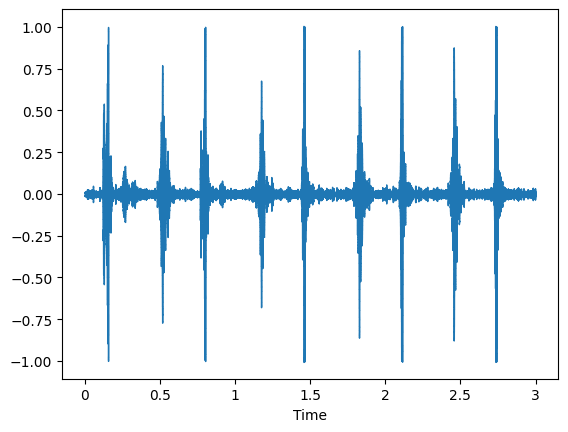

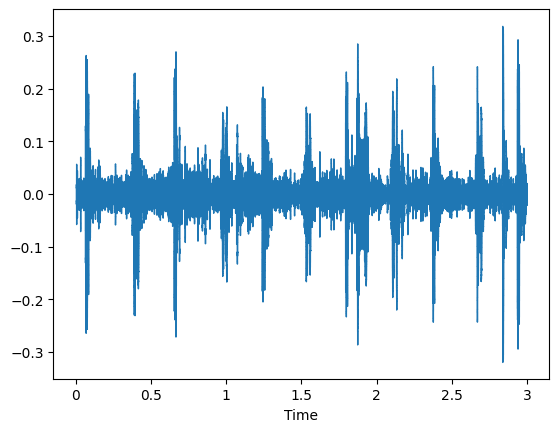

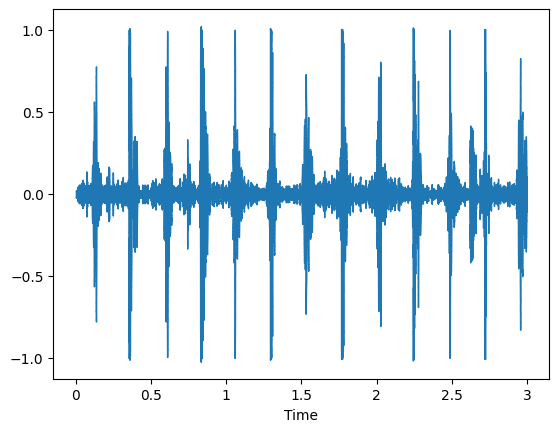

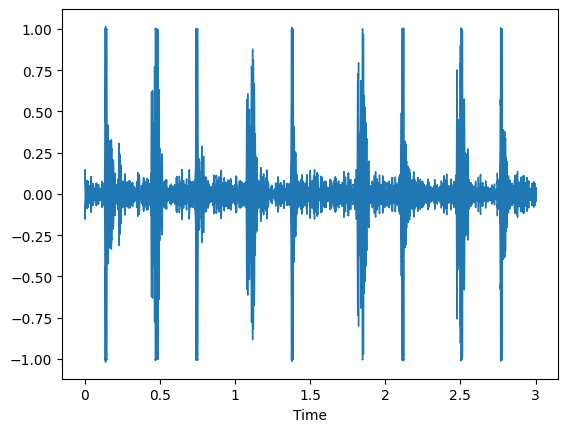

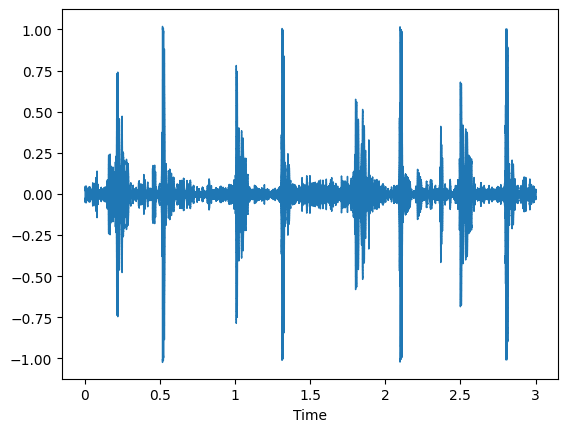

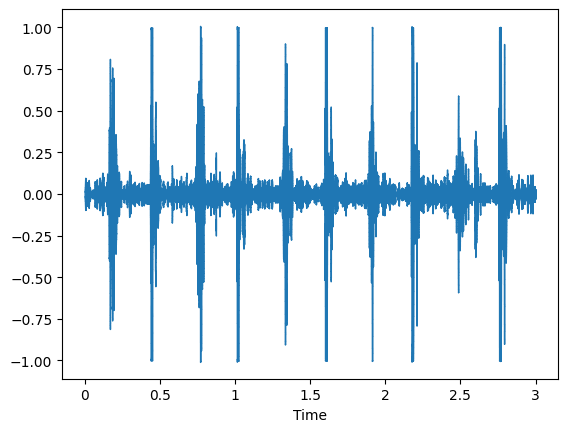

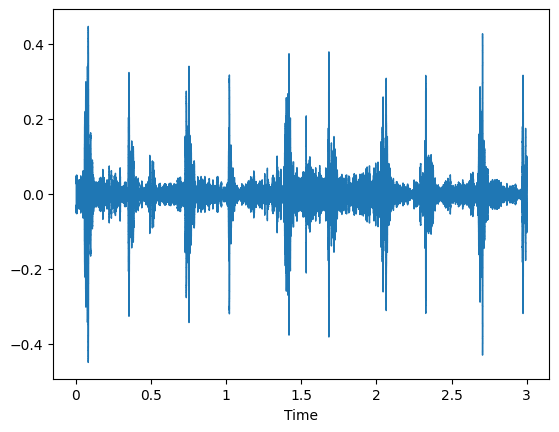

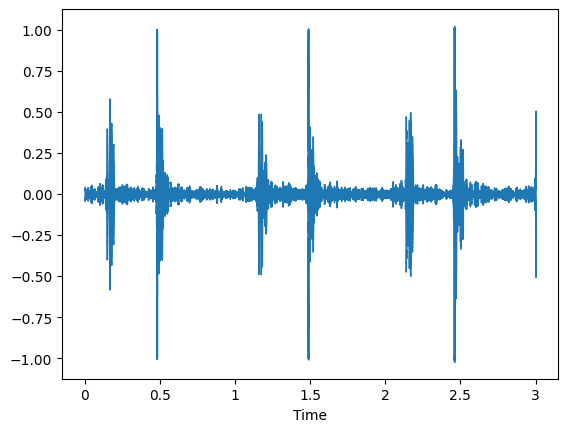

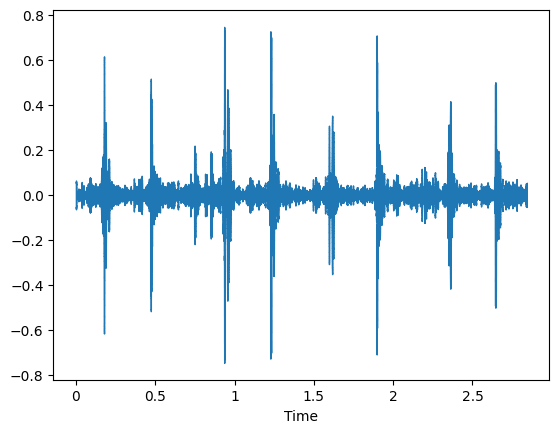

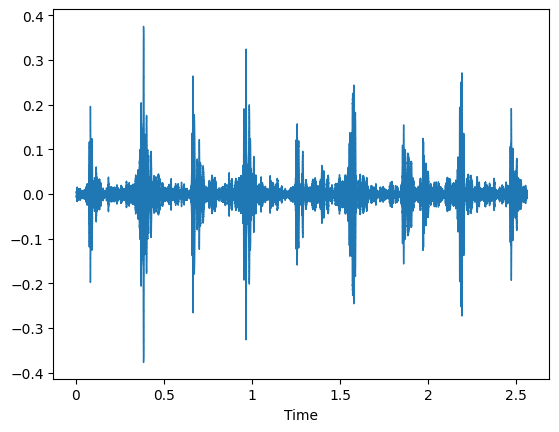

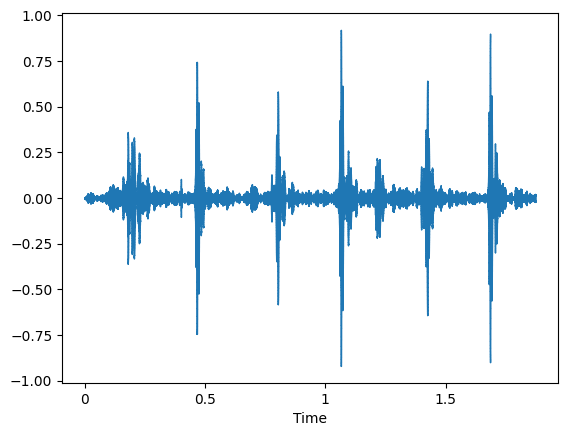

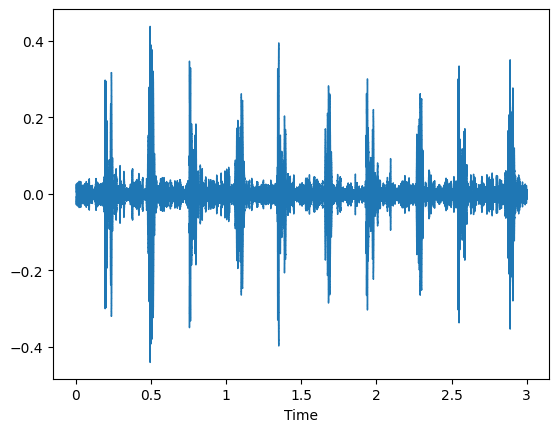

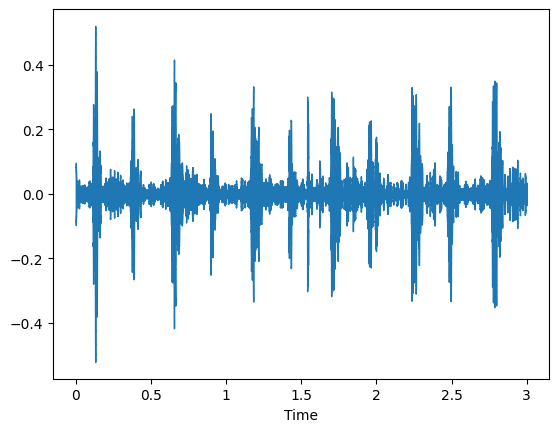

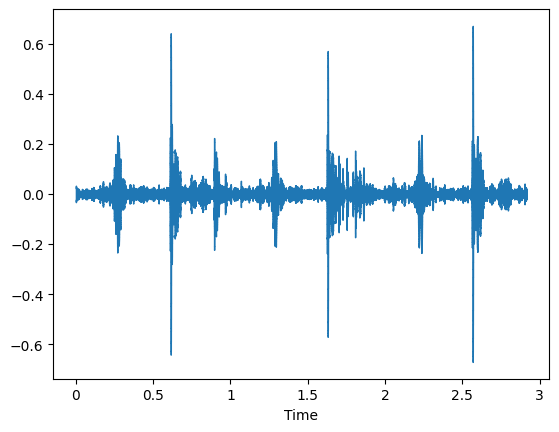

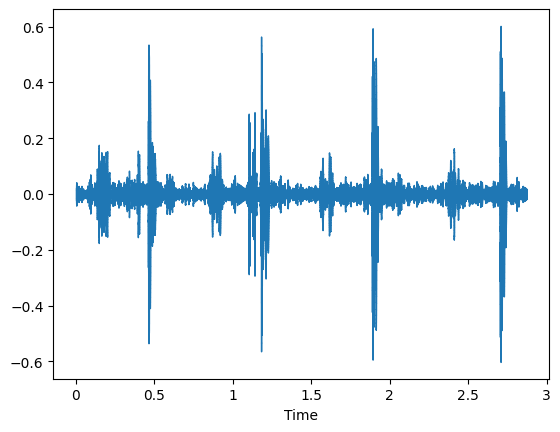

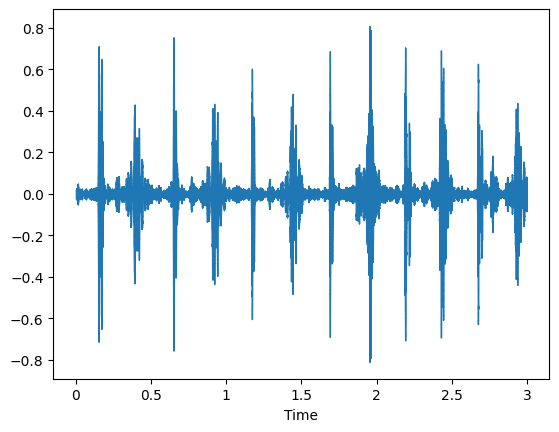

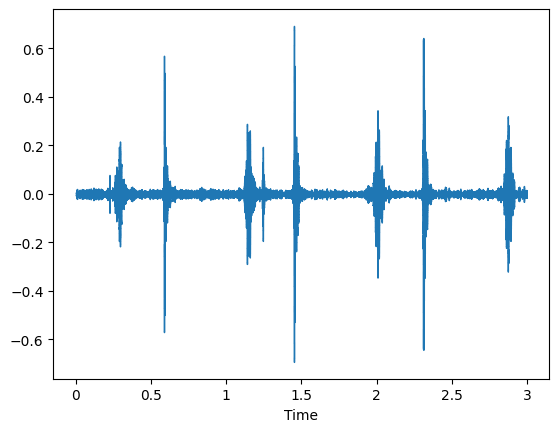

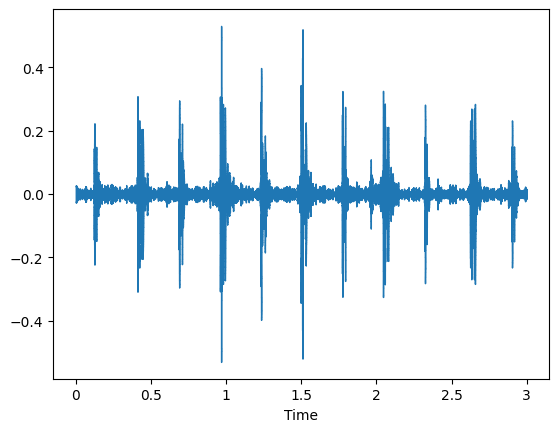

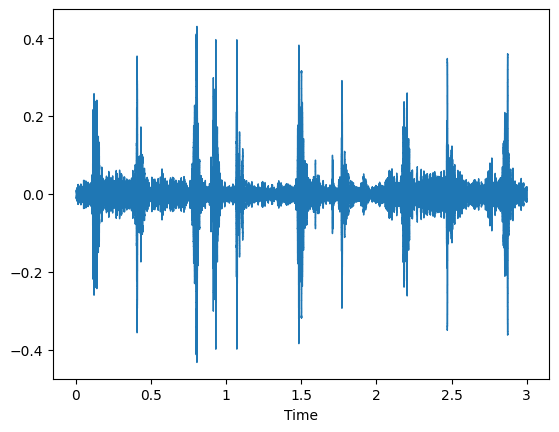

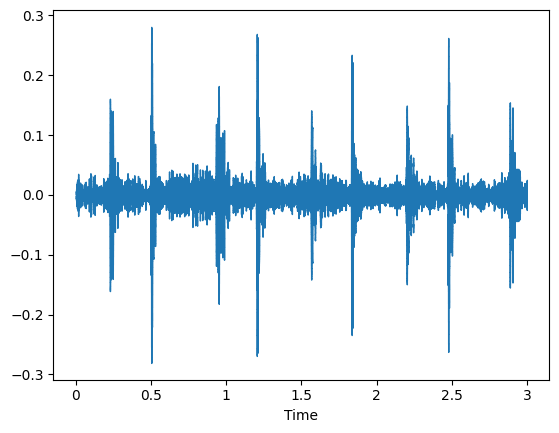

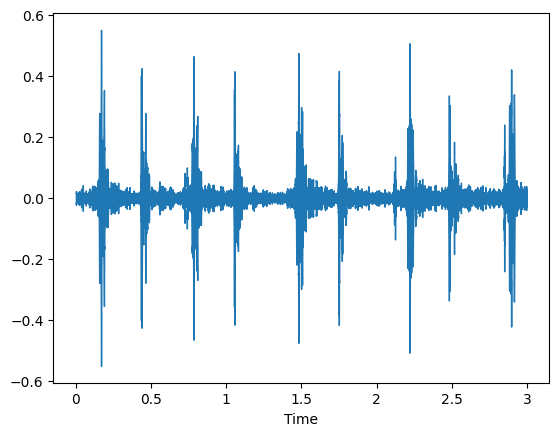

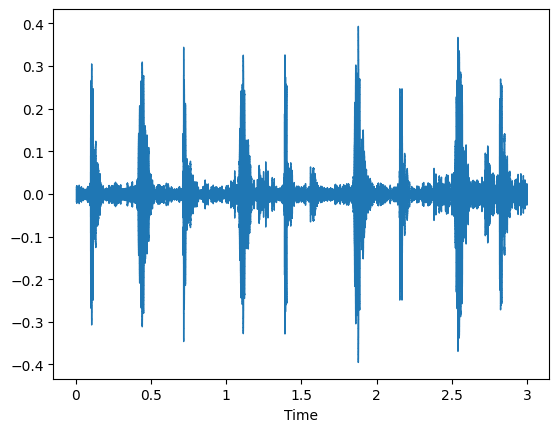

In [9]:
import os
import librosa
import matplotlib.pyplot as plt

for files in os.listdir("../dataset/extrastoles/"):
    if files.endswith(".wav"):
        y, sr = librosa.load("../dataset/extrastoles/"+files, duration=3)
        librosa.display.waveshow(y)
        plt.show()
        